In [1]:
import nltk
nltk.download('omw-1.4')

import spacy
import numpy as np
import pandas as pd
import math
import itertools
import operator as op
import matplotlib.pyplot as plt
import re

from nltk.tokenize import RegexpTokenizer

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from statistics import mean
from statistics import median
from statistics import stdev

[nltk_data] Downloading package omw-1.4 to /home/vincent/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
doc1 = "The history of Corsica goes back to antiquity, and was known to Herodotus, who described Phoenician habitation in the 6th century BCE. Etruscans and Carthaginians expelled the Phoenicians, and remained until the Romans arrived during the Punic Wars in 237 BCE. Vandals occupied it in 430 CE, followed by the Byzantine Empire a century later."
doc2 = "Raided by various Germanic and other groups for two centuries, it was conquered in 774 by Charlemagne under the Holy Roman Empire, which fought for control against the Saracens. After a period of feudal anarchy, the island was transferred to the papacy, then to city states Pisa and Genoa, which retained control over it for five centuries, until the establishment of the Corsican Republic in 1755. The French gained control in the 1768 Treaty of Versailles. Corsica was briefly independent as a Kingdom in union with Great Britain after the French Revolution in 1789, with a viceroy and elected Parliament, but returned to French rule in 1796."
doc3 = "Corsica strongly supported the allies in World War I, caring for wounded, and housing POWs. The poilus fought loyally and suffered great casualties. A recession after the war prompted a mass exodus to southern France. Wealthy Corsicans became colonizers in Algeria and Indochina."

corp = [doc1, doc2, doc3]

In [3]:
from TopicModelingModule import PreprocessingCorpus

[nltk_data] Downloading package omw-1.4 to /home/vincent/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
test = PreprocessingCorpus(corp)
test.lower_case()
test.tokenization()
corp = test.corpus

Tokenization done.


In [5]:
from TopicModelingModule import EntropyAnalysis

In [6]:
entest = EntropyAnalysis(corp)

In [7]:
entest.frequency_calculation()

The frequency of the unique tokens of this corpus has been done.


In [8]:
entest.vocabulary_set()

The vocabulary contains 129 unique tokens.


In [9]:
entest.set_ndocs()

The corpus is composed of 3.


In [10]:
entest.entropy_calculation(output="both")

,Entropy,Weight score
the,0.920620,16.571157
of,0.511860,2.047438
corsica,1.000000,3.000000
to,0.920620,5.523719
and,1.000000,9.000000
was,0.511860,2.047438
in,0.905619,9.961804
until,0.630930,1.261860
it,0.579380,1.738140
by,0.579380,1.738140


In [11]:
entest.exploratory_statistics()

,Entropy,Weight score
Max value,1.000000,16.571157
Min value,0.511860,1.261860
Mean,0.716557,4.124036
Median,0.630930,2.047438
Standard deviation,0.188473,4.326273


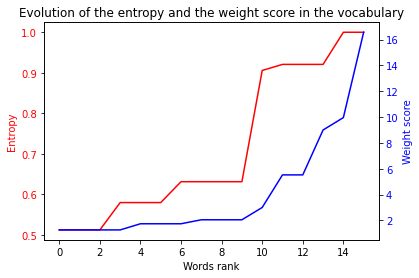

In [12]:
entest.plot_scores(entest.classification)

In [13]:
entest.classification_sort(data=entest.classification, min_range=0.6, max_range=0.95, inclusive=True)

/home/vincent/dev/MEMOIRE/6_TopicModels/TopicModelingModule.py:200: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  sorted_classification = data.loc[data[col_name].between(min_range, max_range, inclusive=inclusive)]


,Entropy,Weight score
the,0.920620,16.571157
to,0.920620,5.523719
in,0.905619,9.961804
until,0.630930,1.261860
empire,0.630930,1.261860
a,0.920620,5.523719
fought,0.630930,1.261860
great,0.630930,1.261860


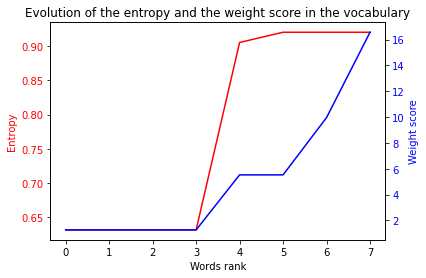

In [15]:
entest.plot_scores(entest.sorted_classification)

In [16]:
new_voc = entest.return_vocabulary(entest.sorted_classification)

In [17]:
new_voc

['the', 'to', 'in', 'until', 'empire', 'a', 'fought', 'great']

In [20]:
help(EntropyAnalysis)

Help on class EntropyAnalysis in module TopicModelingModule:

class EntropyAnalysis(builtins.object)
 |  EntropyAnalysis(corpus, frequency=None, vocabulary=None, ndocs=None)
 |  
 |  Class allowing to calculate the entropy (Susan T. Dumais, 1992) and the weight of words in a corpus of documents. Also allows to manipulate the data to have different results and to have as output a vocabulary of words sorted according to their entropy or weight.
 |  
 |  Input -> Tokenized corpus of documents (List of documents tokenized)
 |  Output -> Graphs, DataFrame, TSV files or vocabulary
 |  
 |  Methods defined here:
 |  
 |  __init__(self, corpus, frequency=None, vocabulary=None, ndocs=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  classification_sort(self, data, min_range, max_range, col_name='Entropy', between_values=True, inclusive=False, output='dataframe')
 |      Allows to choose a subset of the original classification of entropies ans weights.
 |     